In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
df_auto_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', sep=",", header=None)
df_auto_data.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df_auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Columns symboling and normalized-losses are not relevant so I am dropping these two columns from the dataframe

In [6]:

df_auto_data.drop(['symboling','normalized-losses'], axis=1, inplace=True)
df_auto_data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# know more about data

In [7]:
df_auto_data.shape

(205, 24)

In [8]:
df_auto_data.describe()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
df_auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel-type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num-of-doors       205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    object 
 13  num-of-cylinders   205 non-null    object 
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    object 
 16  bore               205 non

# Data Cleaning

In [10]:
df_auto_data.horsepower.unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

Replacing '?' with mean value of horsepower

In [11]:
df_auto_data[df_auto_data['horsepower'] == '?']

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [12]:
df_auto_data.at[130,'horsepower'], df_auto_data.at[131,'horsepower'] = 0, 0

df_auto_data.horsepower = df_auto_data.horsepower.astype('int')


horsepower_mean = df_auto_data.horsepower.mean()

df_auto_data.at[130,'horsepower'], df_auto_data.at[131,'horsepower'] = horsepower_mean, horsepower_mean

df_auto_data.horsepower.describe()

count    205.000000
mean     104.243902
std       39.519405
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [13]:
df_auto_data['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [14]:
df_auto_data[df_auto_data['num-of-doors'] == '?'] 
df_auto_data.at[27,'num-of-doors'], df_auto_data.at[63,'num-of-doors'] = 'four', 'four'

In [15]:
df_auto_data['bore'].unique()
df_auto_data[df_auto_data['bore'] == '?']

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [16]:
df_auto_data['stroke'].unique()
df_auto_data[df_auto_data['stroke'] == '?']

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [17]:
df_auto_data.iloc[55:59, 16:18] = 0

df_auto_data.bore = df_auto_data.bore.astype('float')
df_auto_data.stroke = df_auto_data.stroke.astype('float')

In [18]:
df_auto_data.iloc[55:59, 16] = df_auto_data.bore.mean()

df_auto_data.iloc[55:59, 17] = df_auto_data.stroke.mean()

In [19]:
df_auto_data[df_auto_data['price'] == '?']

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [20]:
df_auto_data.at[9,'price'], df_auto_data.at[44,'price'], df_auto_data.at[45,'price'], df_auto_data.at[129,'price'] = 0, 0, 0, 0

df_auto_data.price = df_auto_data.price.astype('int64')

mean_price = df_auto_data.price.mean()

df_auto_data.at[9,'price'], df_auto_data.at[44,'price'], df_auto_data.at[45,'price'], df_auto_data.at[129,'price'] = mean_price, mean_price, mean_price, mean_price

df_auto_data.price.describe()

count      205.000000
mean     13202.092683
std       7868.849609
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Removing outliers from city-mpg feature

In [21]:
df_auto_data['city-mpg'].max()
df_auto_data.sort_values(by='city-mpg',ascending=False ).head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479
18,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
90,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
45,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,12949
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399


In [22]:
df_auto_data.drop(df_auto_data[df_auto_data['city-mpg'] > 45].index, inplace=True)

Changing datatype of peak-rpm to int64

In [23]:
df_auto_data[df_auto_data['peak-rpm'] == '?']

df_auto_data.at[130,'peak-rpm'], df_auto_data.at[131,'peak-rpm'] = 0, 0

df_auto_data['peak-rpm'] = df_auto_data['peak-rpm'].astype('int64')

mean_rpm = df_auto_data['peak-rpm'].mean()

df_auto_data.at[130,'peak-rpm'], df_auto_data.at[131,'peak-rpm'] = mean_rpm, mean_rpm

In [24]:
df_auto_data['peak-rpm'] .unique()

array([5000, 5500, 5800, 4250, 5400, 6000, 4800, 4750, 4650, 4200, 4350,
       4500, 5200, 4150, 5600, 5900, 5750, 5076, 5250, 4900, 4400, 6600,
       5100, 5300], dtype=int64)


Descriptive statistics after data cleaning

In [25]:

df_auto_data.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,98.867488,174.356650,65.945320,53.741872,2564.975369,127.403941,3.332607,3.254520,10.148374,104.748768,5126.610837,24.995074,30.527094,13274.871921
std,5.945239,11.998036,2.114335,2.446612,514.340965,41.515050,0.269098,0.314684,3.991213,39.379481,478.807824,6.166419,6.535736,7872.856832
min,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.800000,64.150000,52.000000,2179.500000,98.000000,3.150000,3.110000,8.550000,70.000000,4800.000000,19.000000,25.000000,7847.000000
50%,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10698.000000
75%,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,45.000000,50.000000,45400.000000


In [26]:
df_auto_data['body-style'].value_counts()

sedan          96
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

# Data Exploration

Relation between drive-wheels and highway-mpg

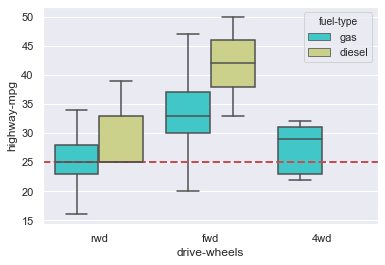

In [27]:
sns.boxplot(x='drive-wheels', y='highway-mpg', hue='fuel-type', data=df_auto_data, palette='rainbow')
plt.axhline(df_auto_data['city-mpg'].mean(),color='r',linestyle='dashed',linewidth=2)

Relation between body-style and peak-rpm

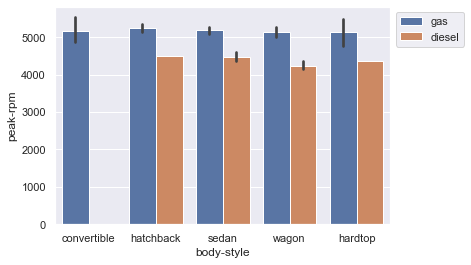

In [28]:
sns.barplot(x="body-style", y="peak-rpm", hue="fuel-type", data=df_auto_data)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

Count of car body-style

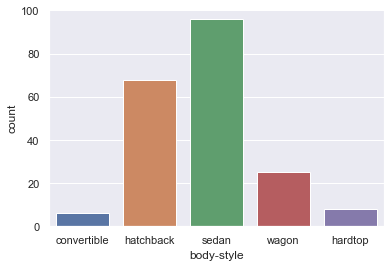

In [29]:
sns.countplot(x="body-style", data=df_auto_data)

 Relation between city-mpg and horsepower

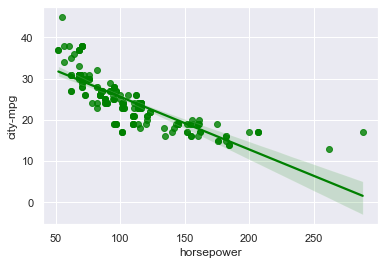

In [30]:
sns.regplot(x=df_auto_data["horsepower"], y=df_auto_data["city-mpg"], fit_reg=True, color='green')

Relation between horsepower and engine-size

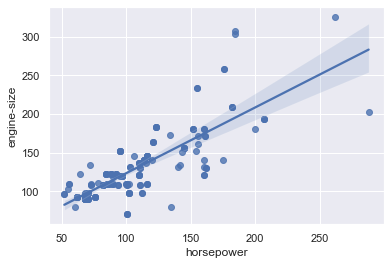

In [31]:
sns.regplot(x=df_auto_data["horsepower"], y=df_auto_data["engine-size"], fit_reg=True)

Correlation heat map for features

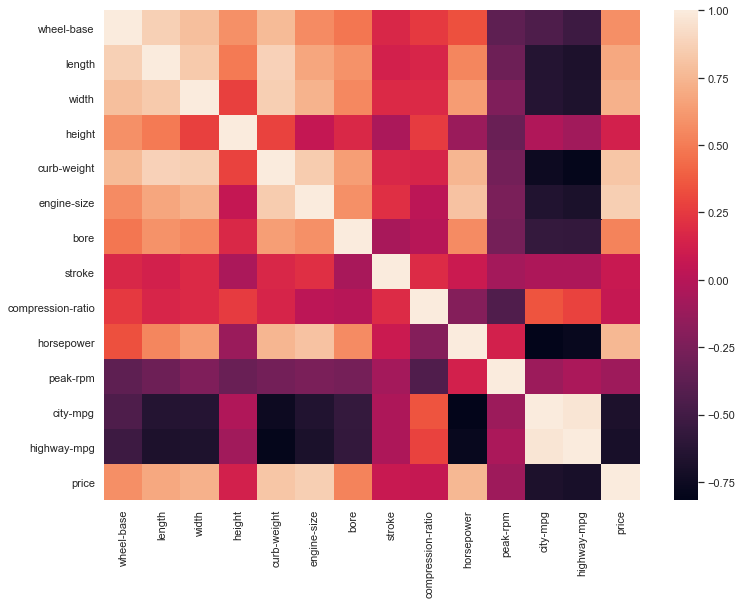

In [32]:
corr_mat = df_auto_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat);

Relation between various features using pairplot

C:\Users\win7\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


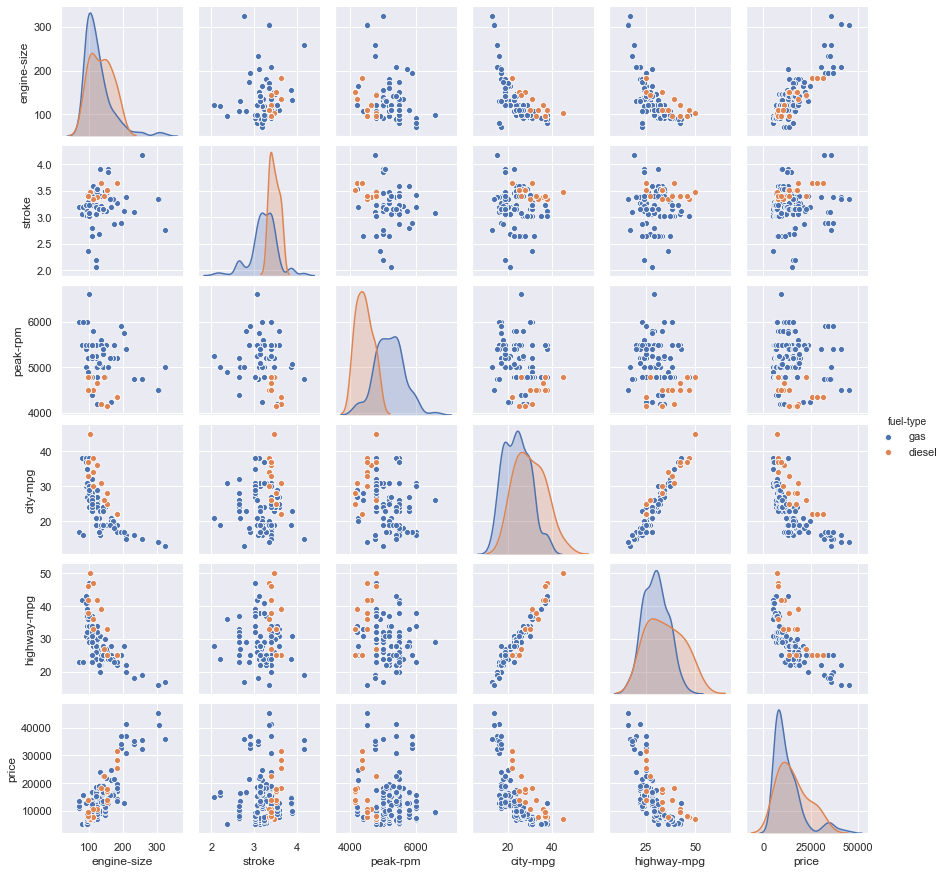

In [33]:
pairplot_columns = ['make','fuel-type', 'body-style','drive-wheels','engine-type','num-of-cylinders','engine-size','fuel-system','stroke','peak-rpm','city-mpg','highway-mpg','price']
sns.set()
sns.pairplot(df_auto_data[pairplot_columns], size = 2.0,hue ='fuel-type')
plt.show()

Distribution plot

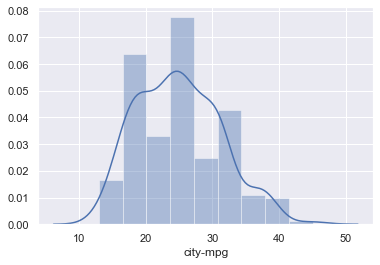

In [34]:
sns.distplot(df_auto_data['city-mpg'])

# Feature Scaling

In [38]:
df_auto_data_scaled = df_auto_data.copy()


Creating a function scale_values that will take a value and scale it between 0 and 1

In [39]:
def scale_values(value):
    return (value-value.min())/(value.max()-value.min())

In [40]:
df_auto_data_copy['horsepower'] = scale_values(df_auto_data_copy['horsepower'])
df_auto_data_copy['peak-rpm'] = scale_values(df_auto_data_copy['peak-rpm'])
df_auto_data_copy['city-mpg'] = scale_values(df_auto_data_copy['city-mpg'])
df_auto_data_copy['highway-mpg'] = scale_values(df_auto_data_copy['highway-mpg'])
df_auto_data_copy['stroke'] = scale_values(df_auto_data_copy['stroke'])
df_auto_data_copy['engine-size'] = scale_values(df_auto_data_copy['engine-size'])
df_auto_data_copy['length'] = scale_values(df_auto_data_copy['length'])
df_auto_data_copy['width'] = scale_values(df_auto_data_copy['width'])
df_auto_data_copy['height'] = scale_values(df_auto_data_copy['height'])

NameError: name 'df_auto_data_copy' is not defined

In [41]:
df_auto_data_copy.head()

NameError: name 'df_auto_data_copy' is not defined

In [42]:
factors = ['horsepower', 'peak-rpm', 'stroke', 'length', 'engine-size']

X = pd.DataFrame(df_auto_data_scaled[factors].copy())
y = df_auto_data_scaled['city-mpg'].copy()

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [44]:
regressor = LinearRegression()

In [45]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lm_coeff = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
lm_coeff

,Coefficient
horsepower,-0.099037
peak-rpm,-0.001625
stroke,0.976308
length,-0.207297
engine-size,0.013120


Running model on test data

In [47]:
y_predicted = regressor.predict(X_test)

In [48]:
df_results = pd.DataFrame({'Actual Mileage':y_test,'Predicted Mileage':y_predicted})
df_results

,Actual Mileage,Predicted Mileage
122,31,29.090493
57,17,24.252790
8,17,17.293434
11,23,23.076836
29,19,22.469205
...,...,...
158,34,32.385859
181,19,17.556895
169,24,24.522669
140,26,32.010981
